In [7]:
import numpy as np
import sklearn as sklearn
import pandas as pd


dataset = pd.read_csv(r"C:\Users\20102\conestoga\AIA\Fall2023\practical_labs\datasets\Lab_2\Lab2_dataset.csv")


print(dataset.head())


   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()


textVect = vectorizer.fit_transform(dataset['text'])
textVect

<5171x50447 sparse matrix of type '<class 'numpy.int64'>'
	with 456145 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    textVect, dataset['label'], test_size=0.2, random_state=0
)

In [12]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [13]:
# Initialize the classifiers
svc_classifier = SVC()
gaussian_nb_classifier = GaussianNB()
multinomial_nb_classifier = MultinomialNB()


svc_classifier.fit(X_train, y_train)
gaussian_nb_classifier.fit(X_train.toarray(), y_train)  # Convert X_train to array for GaussianNB
multinomial_nb_classifier.fit(X_train, y_train)


svc_predictions = svc_classifier.predict(X_test)
gaussian_nb_predictions = gaussian_nb_classifier.predict(X_test.toarray())  # Convert X_test to array for GaussianNB
multinomial_nb_predictions = multinomial_nb_classifier.predict(X_test)


svc_accuracy = accuracy_score(y_test, svc_predictions)
gaussian_nb_accuracy = accuracy_score(y_test, gaussian_nb_predictions)
multinomial_nb_accuracy = accuracy_score(y_test, multinomial_nb_predictions)


print("Support Vector Classifier Report:")
print(classification_report(y_test, svc_predictions))

print("Gaussian Naive Bayes Report:")
print(classification_report(y_test, gaussian_nb_predictions))

print("Multinomial Naive Bayes Report:")
print(classification_report(y_test, multinomial_nb_predictions))

# Print accuracy scores
print("Support Vector Classifier Accuracy:", svc_accuracy)
print("Gaussian Naive Bayes Accuracy:", gaussian_nb_accuracy)
print("Multinomial Naive Bayes Accuracy:", multinomial_nb_accuracy)

Support Vector Classifier Report:
              precision    recall  f1-score   support

         ham       0.98      0.96      0.97       732
        spam       0.91      0.95      0.93       303

    accuracy                           0.96      1035
   macro avg       0.94      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035

Gaussian Naive Bayes Report:
              precision    recall  f1-score   support

         ham       0.96      0.99      0.97       732
        spam       0.97      0.90      0.94       303

    accuracy                           0.96      1035
   macro avg       0.96      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035

Multinomial Naive Bayes Report:
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       732
        spam       0.96      0.96      0.96       303

    accuracy                           0.98      1035
   macro avg       0.97      0.97

## PART II

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv(r"C:\Users\20102\conestoga\AIA\Fall2023\practical_labs\datasets\Lab_2\AB_NYC_2019.csv")


print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

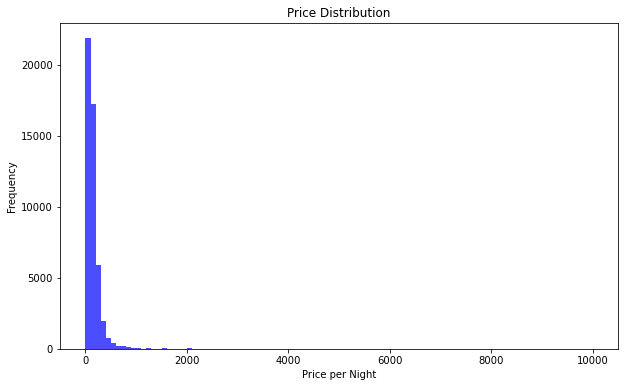

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=100, color='blue', alpha=0.7)
plt.xlabel('Price per Night')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

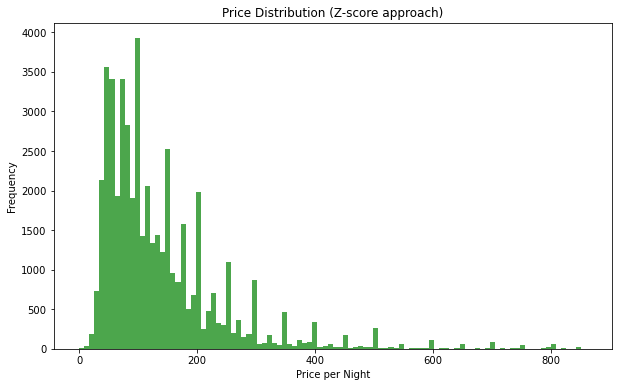

In [16]:
from scipy import stats


z_scores = np.abs(stats.zscore(df['price']))

## 3 standard deviations
threshold = 3


df_no_outliers_zscore = df[(z_scores < threshold)]


plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers_zscore['price'], bins=100, color='green', alpha=0.7)
plt.xlabel('Price per Night')
plt.ylabel('Frequency')
plt.title('Price Distribution (Z-score approach)')
plt.show()


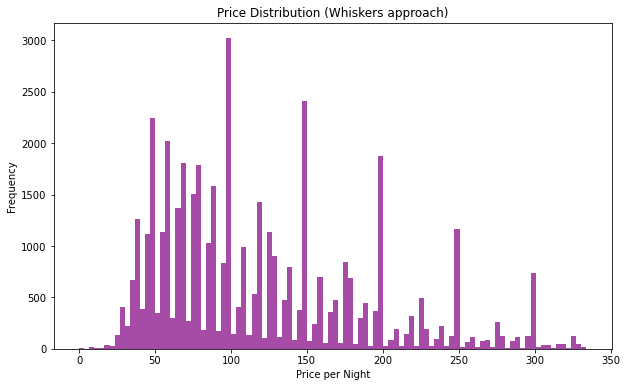

In [17]:

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1


lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR


df_no_outliers_whiskers = df[(df['price'] >= lower_whisker) & (df['price'] <= upper_whisker)]


plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers_whiskers['price'], bins=100, color='purple', alpha=0.7)
plt.xlabel('Price per Night')
plt.ylabel('Frequency')
plt.title('Price Distribution (Whiskers approach)')
plt.show()

In [19]:
# Compare the sizes of the cleaned datasets
print("Original dataset size:", df.shape)
print("no. of Data after Z-score:", df_no_outliers_zscore.shape)
print("no. of Data after Whiskers:", df_no_outliers_whiskers.shape)



Original dataset size: (48895, 16)
no. of Data after Z-score: (48507, 16)
no. of Data after Whiskers: (45923, 16)


#### both approuches removed outliers and the wisker approuch gives us a better presentable data but i beleave that it removed data that shouldn't been removed. so if i want to know the general quantity of data and prices i will choose the wisker just for presentation but for more realistic data i will goo with the Z-score approuch